# Dataset 1 : risk_factors_cervical_cancer

In [1]:
#import all necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('risk_factors_cervical_cancer.csv', header=0)
df = df.dropna()
print(df.shape)
print(list(df.columns))

(858, 36)
['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD', 'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis', 'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis', 'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy']


In [3]:
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,0,0


In [4]:
df.isna().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [5]:
df.dtypes

Age                                    int64
Number of sexual partners             object
First sexual intercourse              object
Num of pregnancies                    object
Smokes                                object
Smokes (years)                        object
Smokes (packs/year)                   object
Hormonal Contraceptives               object
Hormonal Contraceptives (years)       object
IUD                                   object
IUD (years)                           object
STDs                                  object
STDs (number)                         object
STDs:condylomatosis                   object
STDs:cervical condylomatosis          object
STDs:vaginal condylomatosis           object
STDs:vulvo-perineal condylomatosis    object
STDs:syphilis                         object
STDs:pelvic inflammatory disease      object
STDs:genital herpes                   object
STDs:molluscum contagiosum            object
STDs:AIDS                             object
STDs:HIV  

In [6]:
df.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

# Preprocessing Categorical variables

# Preprocessing Number of sexual partners column

In [7]:
print('Total Null Values in Number of sexual partners column:')
print(df['Number of sexual partners'].isna().sum())

print('\nMinimum and Maximum values for Number of sexual partners column:')
print(df['Number of sexual partners'].min(), df['Number of sexual partners'].max())

Total Null Values in Number of sexual partners column:
0

Minimum and Maximum values for Number of sexual partners column:
1.0 ?


In [8]:
df['Number of sexual partners'].value_counts()

2.0     272
3.0     208
1.0     206
4.0      78
5.0      44
?        26
6.0       9
7.0       7
8.0       4
9.0       1
28.0      1
15.0      1
10.0      1
Name: Number of sexual partners, dtype: int64

In [9]:
df['Number of sexual partners'].replace(to_replace="?",value=0,inplace=True)
df['Number of sexual partners'].value_counts()

2.0     272
3.0     208
1.0     206
4.0      78
5.0      44
0        26
6.0       9
7.0       7
8.0       4
9.0       1
28.0      1
15.0      1
10.0      1
Name: Number of sexual partners, dtype: int64

In [10]:
df['Number of sexual partners'] = df['Number of sexual partners'].apply(lambda x:float(x))

In [11]:
#Discretizing the Number of sexual partners column
cut_label_Numberofsexualpartner = ['0','1', '2', '3', '4']

cut_bins = [-1, 1, 2, 3, 4,29]

df['Number of sexual partners'] = pd.cut(df['Number of sexual partners'], bins=cut_bins, labels=cut_label_Numberofsexualpartner)

df['Number of sexual partners'].value_counts()

1    272
0    232
2    208
3     78
4     68
Name: Number of sexual partners, dtype: int64

# Preprocessing First sexual intercourse column

In [12]:
print('Total Null Values in First sexual intercourse column:')
print(df['First sexual intercourse'].isna().sum())

print('\nMinimum and Maximum values for First sexual intercourse column:')
print(df['First sexual intercourse'].min(), df['First sexual intercourse'].max())

Total Null Values in First sexual intercourse column:
0

Minimum and Maximum values for First sexual intercourse column:
10.0 ?


In [13]:
df['First sexual intercourse'].value_counts()

15.0    163
17.0    151
18.0    137
16.0    121
14.0     79
19.0     60
20.0     37
13.0     25
21.0     20
23.0      9
22.0      9
26.0      7
?         7
27.0      6
12.0      6
24.0      6
29.0      5
28.0      3
11.0      2
25.0      2
10.0      2
32.0      1
Name: First sexual intercourse, dtype: int64

In [14]:
df['First sexual intercourse'].replace(to_replace="?",value=0,inplace=True)
df['First sexual intercourse'].value_counts()

15.0    163
17.0    151
18.0    137
16.0    121
14.0     79
19.0     60
20.0     37
13.0     25
21.0     20
22.0      9
23.0      9
26.0      7
0         7
12.0      6
24.0      6
27.0      6
29.0      5
28.0      3
25.0      2
11.0      2
10.0      2
32.0      1
Name: First sexual intercourse, dtype: int64

In [15]:
df['First sexual intercourse'] = df['First sexual intercourse'].apply(lambda x:float(x))

In [16]:
#Discretizing the First sexual intercourse column
cut_label_First_sexual_intercourse = ['0','1', '2', '3','4','5']

cut_bins = [-1,14,15,16,17,18,40]

df['First sexual intercourse'] = pd.cut(df['First sexual intercourse'], bins=cut_bins, labels=cut_label_First_sexual_intercourse)

df['First sexual intercourse'].value_counts()

5    165
1    163
3    151
4    137
2    121
0    121
Name: First sexual intercourse, dtype: int64

# Preprocessing Num of pregnancies column

In [17]:
print('Total Null Values in Num of pregnancies column:')
print(df['Num of pregnancies'].isna().sum())

print('\nMinimum and Maximum values for Num of pregnancies column:')
print(df['Num of pregnancies'].min(), df['Num of pregnancies'].max())

Total Null Values in Num of pregnancies column:
0

Minimum and Maximum values for Num of pregnancies column:
0.0 ?


In [18]:
df['Num of pregnancies'].value_counts()

1.0     270
2.0     240
3.0     139
4.0      74
?        56
5.0      35
6.0      18
0.0      16
7.0       6
8.0       2
11.0      1
10.0      1
Name: Num of pregnancies, dtype: int64

In [19]:
df['Num of pregnancies'].replace(to_replace="?",value=12,inplace=True)
df['Num of pregnancies'].value_counts()

1.0     270
2.0     240
3.0     139
4.0      74
12       56
5.0      35
6.0      18
0.0      16
7.0       6
8.0       2
11.0      1
10.0      1
Name: Num of pregnancies, dtype: int64

In [20]:
df['Num of pregnancies'] = df['Num of pregnancies'].apply(lambda x:float(x))

In [21]:
#Discretizing the Num of pregnancies column
cut_label_pregnancies = ['1', '2', '3', '4', '5']

cut_bins = [-1,1,2,3,4,12]

df['Num of pregnancies'] = pd.cut(df['Num of pregnancies'], bins=cut_bins, labels=cut_label_pregnancies)

df['Num of pregnancies'].value_counts()

1    286
2    240
3    139
5    119
4     74
Name: Num of pregnancies, dtype: int64

# Preprocessing Smokes column

In [22]:
print('Total Null Values in Smokes column:')
print(df['Smokes'].isna().sum())

print('\nMinimum and Maximum values for Smokes column:')
print(df['Smokes'].min(), df['Smokes'].max())

Total Null Values in Smokes column:
0

Minimum and Maximum values for Smokes column:
0.0 ?


In [23]:
df['Smokes'].value_counts()

0.0    722
1.0    123
?       13
Name: Smokes, dtype: int64

In [24]:
df['Smokes'].replace(to_replace="?",value=2,inplace=True)
df['Smokes'].value_counts()

0.0    722
1.0    123
2       13
Name: Smokes, dtype: int64

In [25]:
df['Smokes'] = df['Smokes'].apply(lambda x:float(x))

In [26]:
#Discretizing the Smokes column
cut_label_Smokes = ['1', '2', '3']

cut_bins = [-1, 0,1,2]

df['Smokes'] = pd.cut(df['Smokes'], bins=cut_bins, labels=cut_label_Smokes)

df['Smokes'].value_counts()

1    722
2    123
3     13
Name: Smokes, dtype: int64

# Preprocessing Smokes (years) column

In [27]:
print('Total Null Values in Smokes (years) column:')
print(df['Smokes (years)'].isna().sum())

print('\nMinimum and Maximum values for Smokes (years) column:')
print(df['Smokes (years)'].min(), df['Smokes (years)'].max())

Total Null Values in Smokes (years) column:
0

Minimum and Maximum values for Smokes (years) column:
0.0 ?


In [28]:
df['Smokes (years)'].value_counts()

0.0            722
1.266972909     15
?               13
5.0              9
9.0              9
1.0              8
2.0              7
3.0              7
7.0              6
16.0             6
8.0              6
11.0             5
10.0             5
4.0              5
6.0              4
14.0             4
15.0             4
13.0             3
0.5              3
12.0             3
19.0             3
22.0             2
28.0             1
21.0             1
18.0             1
0.16             1
20.0             1
24.0             1
32.0             1
37.0             1
34.0             1
Name: Smokes (years), dtype: int64

In [29]:
df['Smokes (years)'].replace(to_replace="?",value=40,inplace=True)
df['Smokes (years)'].value_counts()

0.0            722
1.266972909     15
40              13
5.0              9
9.0              9
1.0              8
2.0              7
3.0              7
7.0              6
16.0             6
8.0              6
11.0             5
10.0             5
4.0              5
6.0              4
14.0             4
15.0             4
13.0             3
0.5              3
12.0             3
19.0             3
22.0             2
28.0             1
21.0             1
18.0             1
0.16             1
20.0             1
24.0             1
32.0             1
37.0             1
34.0             1
Name: Smokes (years), dtype: int64

In [30]:
df['Smokes (years)'] = df['Smokes (years)'].apply(lambda x:float(x))

In [31]:
#Discretizing the Smokes (years) column

cut_label_Smokes_years = ['1', '2']

cut_bins = [-1, 0, 40]

df['Smokes (years)'] = pd.cut(df['Smokes (years)'], bins=cut_bins, labels=cut_label_Smokes_years)

df['Smokes (years)'].value_counts()

1    722
2    136
Name: Smokes (years), dtype: int64

# Preprocessing Smokes (packs/year) column

In [32]:
print('Total Null Values in Smokes (packs/year) column:')
print(df['Smokes (packs/year)'].isna().sum())

print('\nMinimum and Maximum values for Smokes (packs/year) column:')
print(df['Smokes (packs/year)'].min(), df['Smokes (packs/year)'].max())

Total Null Values in Smokes (packs/year) column:
0

Minimum and Maximum values for Smokes (packs/year) column:
0.0 ?


In [33]:
df['Smokes (packs/year)'].value_counts()

0.0             722
0.5132021277     18
?                13
1.0               6
3.0               5
               ... 
0.25              1
1.65              1
2.2               1
22.0              1
7.6               1
Name: Smokes (packs/year), Length: 63, dtype: int64

In [34]:
df['Smokes (packs/year)'].replace(to_replace="?",value=40,inplace=True)
df['Smokes (packs/year)'].value_counts()

0.0             722
0.5132021277     18
40               13
1.0               6
3.0               5
               ... 
0.25              1
1.65              1
2.2               1
22.0              1
7.6               1
Name: Smokes (packs/year), Length: 63, dtype: int64

In [35]:
df['Smokes (packs/year)'] = df['Smokes (packs/year)'].apply(lambda x:float(x))

In [36]:
#Discretizing the Smokes (packs/year) column
cut_label_Smokes_packyears = ['1', '2', '3']

cut_bins = [-1, 0,1,41]

df['Smokes (packs/year)'] = pd.cut(df['Smokes (packs/year)'], bins=cut_bins, labels=cut_label_Smokes_packyears)

df['Smokes (packs/year)'].value_counts()

1    722
3     78
2     58
Name: Smokes (packs/year), dtype: int64

# Preprocessing Hormonal Contraceptives column

In [37]:
print('Total Null Values in Hormonal Contraceptives column:')
print(df['Hormonal Contraceptives'].isna().sum())

print('\nMinimum and Maximum values for Hormonal Contraceptives column:')
print(df['Hormonal Contraceptives'].min(), df['Hormonal Contraceptives'].max())

Total Null Values in Hormonal Contraceptives column:
0

Minimum and Maximum values for Hormonal Contraceptives column:
0.0 ?


In [38]:
df['Hormonal Contraceptives'].value_counts()

1.0    481
0.0    269
?      108
Name: Hormonal Contraceptives, dtype: int64

In [39]:
df['Hormonal Contraceptives'].replace(to_replace="?",value=2,inplace=True)
df['Hormonal Contraceptives'].value_counts()

1.0    481
0.0    269
2      108
Name: Hormonal Contraceptives, dtype: int64

In [40]:
df['Hormonal Contraceptives'] = df['Hormonal Contraceptives'].apply(lambda x:float(x))

In [41]:
df['Hormonal Contraceptives'].value_counts()

1.0    481
0.0    269
2.0    108
Name: Hormonal Contraceptives, dtype: int64

# Preprocessing Hormonal Contraceptives (years) column

In [42]:
print('Total Null Values in Hormonal Contraceptives (years) column:')
print(df['Hormonal Contraceptives (years)'].isna().sum())

print('\nMinimum and Maximum values for Hormonal Contraceptives (years) column:')
print(df['Hormonal Contraceptives (years)'].min(), df['Hormonal Contraceptives (years)'].max())

Total Null Values in Hormonal Contraceptives (years) column:
0

Minimum and Maximum values for Hormonal Contraceptives (years) column:
0.0 ?


In [43]:
print(df['Hormonal Contraceptives (years)'].min(), df['Hormonal Contraceptives (years)'].max())

0.0 ?


In [44]:
df['Hormonal Contraceptives (years)'].value_counts()

0.0            269
?              108
1.0             77
0.25            41
2.0             40
3.0             39
5.0             34
0.5             25
0.08            25
6.0             24
4.0             22
7.0             21
8.0             18
0.16            16
9.0             12
10.0            11
0.33             9
0.42             8
0.75             7
15.0             6
0.66             6
0.58             6
20.0             4
12.0             4
1.5              3
19.0             2
11.0             2
2.282200521      2
16.0             2
14.0             2
0.67             2
13.0             2
6.5              1
2.5              1
0.41             1
4.5              1
30.0             1
0.17             1
3.5              1
22.0             1
17.0             1
Name: Hormonal Contraceptives (years), dtype: int64

In [45]:
df['Hormonal Contraceptives (years)'].replace(to_replace="?",value=25,inplace=True)
df['Hormonal Contraceptives (years)'].value_counts()

0.0            269
25             108
1.0             77
0.25            41
2.0             40
3.0             39
5.0             34
0.5             25
0.08            25
6.0             24
4.0             22
7.0             21
8.0             18
0.16            16
9.0             12
10.0            11
0.33             9
0.42             8
0.75             7
15.0             6
0.66             6
0.58             6
20.0             4
12.0             4
1.5              3
19.0             2
11.0             2
2.282200521      2
14.0             2
0.67             2
16.0             2
13.0             2
6.5              1
2.5              1
0.41             1
4.5              1
30.0             1
0.17             1
3.5              1
22.0             1
17.0             1
Name: Hormonal Contraceptives (years), dtype: int64

In [46]:
df['Hormonal Contraceptives (years)'] = df['Hormonal Contraceptives (years)'].apply(lambda x:float(x))

In [47]:
#Discretizing the Hormonal Contraceptives (years) column

cut_label_Hormonal_Contraceptives_years = ['1','2', '3']

cut_bins = [-1, 0, 1, 30]

df['Hormonal Contraceptives (years)'] = pd.cut(df['Hormonal Contraceptives (years)'], bins=cut_bins, labels=cut_label_Hormonal_Contraceptives_years)

df['Hormonal Contraceptives (years)'].value_counts()

3    365
1    269
2    224
Name: Hormonal Contraceptives (years), dtype: int64

# Preprocessing IUD column

In [48]:
print('Total Null Values in IUD column:')
print(df['IUD'].isna().sum())

print('\nMinimum and Maximum values for IUD column:')
print(df['IUD'].min(), df['IUD'].max())

Total Null Values in IUD column:
0

Minimum and Maximum values for IUD column:
0.0 ?


In [49]:
df['IUD'].value_counts()

0.0    658
?      117
1.0     83
Name: IUD, dtype: int64

In [50]:
df['IUD'].replace(to_replace="?",value=2,inplace=True)
df['IUD'].value_counts()

0.0    658
2      117
1.0     83
Name: IUD, dtype: int64

In [51]:
df['IUD'] = df['IUD'].apply(lambda x:float(x))

# Preprocessing IUD (years) column

In [52]:
print('Total Null Values in IUD (years) column:')
print(df['IUD (years)'].isna().sum())

print('\nMinimum and Maximum values for IUD (years) column:')
print(df['IUD (years)'].min(), df['IUD (years)'].max())

Total Null Values in IUD (years) column:
0

Minimum and Maximum values for IUD (years) column:
0.0 ?


In [53]:
df['IUD (years)'].value_counts()

0.0     658
?       117
3.0      11
2.0      10
5.0       9
1.0       8
8.0       7
7.0       7
6.0       5
4.0       5
11.0      3
0.08      2
0.5       2
0.91      1
15.0      1
10.0      1
0.16      1
9.0       1
0.41      1
12.0      1
0.33      1
0.58      1
0.17      1
1.5       1
0.25      1
19.0      1
17.0      1
Name: IUD (years), dtype: int64

In [54]:
df['IUD (years)'].replace(to_replace="?",value=20,inplace=True)
df['IUD (years)'].value_counts()

0.0     658
20      117
3.0      11
2.0      10
5.0       9
1.0       8
8.0       7
7.0       7
6.0       5
4.0       5
11.0      3
0.08      2
0.5       2
0.91      1
0.41      1
10.0      1
0.16      1
9.0       1
0.33      1
12.0      1
15.0      1
0.58      1
0.17      1
1.5       1
0.25      1
19.0      1
17.0      1
Name: IUD (years), dtype: int64

In [55]:
df['IUD (years)'] = df['IUD (years)'].apply(lambda x:float(x))

In [56]:
#Discretizing the IUD (years) column
cut_label_IUD_y = ['1','2','3']

cut_bins = [-1, 0, 10,20]

df['IUD (years)'] = pd.cut(df['IUD (years)'], bins=cut_bins, labels=cut_label_IUD_y)

df['IUD (years)'].value_counts()

1    658
3    124
2     76
Name: IUD (years), dtype: int64

# Preprocessing STDs column

In [57]:
print('Total Null Values in STDs column:')
print(df['STDs'].isna().sum())

print('\nMinimum and Maximum values for STDs column:')
print(df['STDs'].min(), df['STDs'].max())

Total Null Values in STDs column:
0

Minimum and Maximum values for STDs column:
0.0 ?


In [58]:
df['STDs'].value_counts()

0.0    674
?      105
1.0     79
Name: STDs, dtype: int64

In [59]:
df['STDs'].replace(to_replace="?",value=2,inplace=True)
df['STDs'].value_counts()

0.0    674
2      105
1.0     79
Name: STDs, dtype: int64

In [60]:
df['IUD'] = df['IUD'].apply(lambda x:float(x))

# Preprocessing STDs (number) column

In [61]:
print('Total Null Values in STDs (number) column:')
print(df['STDs (number)'].isna().sum())

print('\nMinimum and Maximum values for STDs (number) column:')
print(df['STDs (number)'].min(), df['STDs (number)'].max())

Total Null Values in STDs (number) column:
0

Minimum and Maximum values for STDs (number) column:
0.0 ?


In [62]:
df['STDs (number)'].value_counts()

0.0    674
?      105
2.0     37
1.0     34
3.0      7
4.0      1
Name: STDs (number), dtype: int64

In [63]:
df['STDs (number)'].replace(to_replace="?",value=5,inplace=True)
df['STDs (number)'].value_counts()

0.0    674
5      105
2.0     37
1.0     34
3.0      7
4.0      1
Name: STDs (number), dtype: int64

In [64]:
df['STDs (number)'] = df['STDs (number)'].apply(lambda x:float(x))

In [65]:
#Discretizing the STDs (number) column

cut_label_STDs_number = ['1','2']

cut_bins = [-1, 0, 6]

df['STDs (number)'] = pd.cut(df['STDs (number)'], bins=cut_bins, labels=cut_label_STDs_number)

df['STDs (number)'].value_counts()

1    674
2    184
Name: STDs (number), dtype: int64

# Preprocessing STDs:condylomatosis column

In [66]:
print('Total Null Values in STDs:condylomatosis column:')
print(df['STDs:condylomatosis'].isna().sum())

print('\nMinimum and Maximum values for STDs:condylomatosis column:')
print(df['STDs:condylomatosis'].min(), df['STDs:condylomatosis'].max())

Total Null Values in STDs:condylomatosis column:
0

Minimum and Maximum values for STDs:condylomatosis column:
0.0 ?


In [67]:
df['STDs:condylomatosis'].value_counts()

0.0    709
?      105
1.0     44
Name: STDs:condylomatosis, dtype: int64

In [68]:
df['STDs:condylomatosis'].replace(to_replace="?",value=2,inplace=True)
df['STDs:condylomatosis'].value_counts()

0.0    709
2      105
1.0     44
Name: STDs:condylomatosis, dtype: int64

In [69]:
df['STDs:condylomatosis'] = df['STDs:condylomatosis'].apply(lambda x:float(x))

# Preprocessing STDs:cervical condylomatosis column

In [70]:
print('Total Null Values in STDs:cervical condylomatosis column:')
print(df['STDs:cervical condylomatosis'].isna().sum())

print('\nMinimum and Maximum values for STDs:cervical condylomatosis column:')
print(df['STDs:cervical condylomatosis'].min(), df['STDs:cervical condylomatosis'].max())

Total Null Values in STDs:cervical condylomatosis column:
0

Minimum and Maximum values for STDs:cervical condylomatosis column:
0.0 ?


In [71]:
df['STDs:cervical condylomatosis'].value_counts()

0.0    753
?      105
Name: STDs:cervical condylomatosis, dtype: int64

In [72]:
df['STDs:cervical condylomatosis'].replace(to_replace="?",value=1,inplace=True)
df['STDs:cervical condylomatosis'].value_counts()

0.0    753
1      105
Name: STDs:cervical condylomatosis, dtype: int64

In [73]:
df['STDs:cervical condylomatosis'] = df['STDs:cervical condylomatosis'].apply(lambda x:float(x))

# Preprocessing STDs:vaginal condylomatosis column

In [74]:
print('Total Null Values in STDs:vaginal condylomatosis column:')
print(df['STDs:vaginal condylomatosis'].isna().sum())

print('\nMinimum and Maximum values for STDs:vaginal condylomatosis column:')
print(df['STDs:vaginal condylomatosis'].min(), df['STDs:vaginal condylomatosis'].max())

Total Null Values in STDs:vaginal condylomatosis column:
0

Minimum and Maximum values for STDs:vaginal condylomatosis column:
0.0 ?


In [75]:
df['STDs:vaginal condylomatosis'].value_counts()

0.0    749
?      105
1.0      4
Name: STDs:vaginal condylomatosis, dtype: int64

In [76]:
df['STDs:vaginal condylomatosis'].replace(to_replace="?",value=2,inplace=True)
df['STDs:vaginal condylomatosis'].value_counts()

0.0    749
2      105
1.0      4
Name: STDs:vaginal condylomatosis, dtype: int64

In [77]:
df['STDs:vaginal condylomatosis'] = df['STDs:vaginal condylomatosis'].apply(lambda x:float(x))

In [78]:
# Discretizing the STDs:vaginal condylomatosis column

cut_label_STDs_vaginal_condylomatosis = ['1','2']

cut_bins = [-1, 0, 3]

df['STDs:vaginal condylomatosis'] = pd.cut(df['STDs:vaginal condylomatosis'], bins=cut_bins, labels=cut_label_STDs_vaginal_condylomatosis)

df['STDs:vaginal condylomatosis'].value_counts()

1    749
2    109
Name: STDs:vaginal condylomatosis, dtype: int64

# Preprocessing STDs:vulvo-perineal condylomatosis column

In [79]:
print('Total Null Values in STDs:vulvo-perineal condylomatosis column:')
print(df['STDs:vulvo-perineal condylomatosis'].isna().sum())

print('\nMinimum and Maximum values for STDs:vulvo-perineal condylomatosis column:')
print(df['STDs:vulvo-perineal condylomatosis'].min(), df['STDs:vulvo-perineal condylomatosis'].max())

Total Null Values in STDs:vulvo-perineal condylomatosis column:
0

Minimum and Maximum values for STDs:vulvo-perineal condylomatosis column:
0.0 ?


In [80]:
df['STDs:vulvo-perineal condylomatosis'].value_counts()

0.0    710
?      105
1.0     43
Name: STDs:vulvo-perineal condylomatosis, dtype: int64

In [81]:
df['STDs:vulvo-perineal condylomatosis'].replace(to_replace="?",value=2,inplace=True)
df['STDs:vulvo-perineal condylomatosis'].value_counts()

0.0    710
2      105
1.0     43
Name: STDs:vulvo-perineal condylomatosis, dtype: int64

In [82]:
df['STDs:vulvo-perineal condylomatosis'] = df['STDs:vulvo-perineal condylomatosis'].apply(lambda x:float(x))

# Preprocessing STDs:syphilis column

In [83]:
print('Total Null Values in STDs:syphilis column:')
print(df['STDs:syphilis'].isna().sum())

print('\nMinimum and Maximum values for STDs:syphilis column:')
print(df['STDs:syphilis'].min(), df['STDs:syphilis'].max())

Total Null Values in STDs:syphilis column:
0

Minimum and Maximum values for STDs:syphilis column:
0.0 ?


In [84]:
df['STDs:syphilis'].value_counts()

0.0    735
?      105
1.0     18
Name: STDs:syphilis, dtype: int64

In [85]:
df['STDs:syphilis'].replace(to_replace="?",value=2,inplace=True)
df['STDs:syphilis'].value_counts()

0.0    735
2      105
1.0     18
Name: STDs:syphilis, dtype: int64

In [86]:
df['STDs:syphilis'] = df['STDs:syphilis'].apply(lambda x:float(x))

In [87]:
#Discretizing the STDs:syphilis column

cut_label_STDs_syphilis = ['1','2']

cut_bins = [-1, 0, 3]

df['STDs:syphilis'] = pd.cut(df['STDs:syphilis'], bins=cut_bins, labels=cut_label_STDs_syphilis)

df['STDs:syphilis'].value_counts()

1    735
2    123
Name: STDs:syphilis, dtype: int64

# Preprocessing STDs:pelvic inflammatory disease column

In [88]:
print('Total Null Values in STDs:pelvic inflammatory disease column:')
print(df['STDs:pelvic inflammatory disease'].isna().sum())

print('\nMinimum and Maximum values for STDs:pelvic inflammatory disease column:')
print(df['STDs:pelvic inflammatory disease'].min(), df['STDs:pelvic inflammatory disease'].max())

Total Null Values in STDs:pelvic inflammatory disease column:
0

Minimum and Maximum values for STDs:pelvic inflammatory disease column:
0.0 ?


In [89]:
df['STDs:pelvic inflammatory disease'].value_counts()

0.0    752
?      105
1.0      1
Name: STDs:pelvic inflammatory disease, dtype: int64

In [90]:
df['STDs:pelvic inflammatory disease'].replace(to_replace="?",value=2,inplace=True)
df['STDs:pelvic inflammatory disease'].value_counts()

0.0    752
2      105
1.0      1
Name: STDs:pelvic inflammatory disease, dtype: int64

In [91]:
df['STDs:pelvic inflammatory disease'] = df['STDs:pelvic inflammatory disease'].apply(lambda x:float(x))

In [92]:
#Discretizing the STDs:pelvic inflammatory disease column

cut_label_STDs_pelvic_inflammatory_disease = ['1','2']

cut_bins = [-1, 0, 3]

df['STDs:pelvic inflammatory disease'] = pd.cut(df['STDs:pelvic inflammatory disease'], bins=cut_bins, labels=cut_label_STDs_pelvic_inflammatory_disease)

df['STDs:pelvic inflammatory disease'].value_counts()

1    752
2    106
Name: STDs:pelvic inflammatory disease, dtype: int64

# Preprocessing STDs:genital herpes column

In [93]:
print('Total Null Values in STDs:genital herpes column:')
print(df['STDs:genital herpes'].isna().sum())

print('\nMinimum and Maximum values for STDs:genital herpes column:')
print(df['STDs:genital herpes'].min(), df['STDs:genital herpes'].max())

Total Null Values in STDs:genital herpes column:
0

Minimum and Maximum values for STDs:genital herpes column:
0.0 ?


In [94]:
df['STDs:genital herpes'].value_counts()

0.0    752
?      105
1.0      1
Name: STDs:genital herpes, dtype: int64

In [95]:
df['STDs:genital herpes'].replace(to_replace="?",value=2,inplace=True)
df['STDs:genital herpes'].value_counts()

0.0    752
2      105
1.0      1
Name: STDs:genital herpes, dtype: int64

In [96]:
df['STDs:genital herpes'] = df['STDs:genital herpes'].apply(lambda x:float(x))

In [97]:
#Discretizing the STDs:genital herpes column

cut_label_STDs_genital_herpes = ['1','2']

cut_bins = [-1, 0, 3]

df['STDs:genital herpes'] = pd.cut(df['STDs:genital herpes'], bins=cut_bins, labels=cut_label_STDs_genital_herpes)

df['STDs:genital herpes'].value_counts()

1    752
2    106
Name: STDs:genital herpes, dtype: int64

# Preprocessing STDs:molluscum contagiosum column

In [98]:
print('Total Null Values in STDs:molluscum contagiosum column:')
print(df['STDs:molluscum contagiosum'].isna().sum())

print('\nMinimum and Maximum values for STDs:molluscum contagiosum column:')
print(df['STDs:molluscum contagiosum'].min(), df['STDs:molluscum contagiosum'].max())

Total Null Values in STDs:molluscum contagiosum column:
0

Minimum and Maximum values for STDs:molluscum contagiosum column:
0.0 ?


In [99]:
df['STDs:molluscum contagiosum'].value_counts()

0.0    752
?      105
1.0      1
Name: STDs:molluscum contagiosum, dtype: int64

In [100]:
df['STDs:molluscum contagiosum'].replace(to_replace="?",value=2,inplace=True)
df['STDs:molluscum contagiosum'].value_counts()

0.0    752
2      105
1.0      1
Name: STDs:molluscum contagiosum, dtype: int64

In [101]:
df['STDs:molluscum contagiosum'] = df['STDs:molluscum contagiosum'].apply(lambda x:float(x))

In [102]:
#Discretizing the STDs:molluscum contagiosum column

cut_label_STDs_molluscum_contagiosum = ['1','2']

cut_bins = [-1, 0, 3]

df['STDs:molluscum contagiosum'] = pd.cut(df['STDs:molluscum contagiosum'], bins=cut_bins, labels=cut_label_STDs_molluscum_contagiosum)

df['STDs:molluscum contagiosum'].value_counts()

1    752
2    106
Name: STDs:molluscum contagiosum, dtype: int64

# Preprocessing STDs:AIDS column

In [103]:
print('Total Null Values in STDs:AIDS column:')
print(df['STDs:AIDS'].isna().sum())

print('\nMinimum and Maximum values for STDs:AIDS column:')
print(df['STDs:AIDS'].min(), df['STDs:AIDS'].max())

Total Null Values in STDs:AIDS column:
0

Minimum and Maximum values for STDs:AIDS column:
0.0 ?


In [104]:
df['STDs:AIDS'].value_counts()

0.0    753
?      105
Name: STDs:AIDS, dtype: int64

In [105]:
df['STDs:AIDS'].replace(to_replace="?",value=1,inplace=True)
df['STDs:AIDS'].value_counts()

0.0    753
1      105
Name: STDs:AIDS, dtype: int64

In [106]:
df['STDs:AIDS'] = df['STDs:AIDS'].apply(lambda x:float(x))

# Preprocessing STDs:HIV column

In [107]:
print('Total Null Values in STDs:HIV column:')
print(df['STDs:HIV'].isna().sum())

print('\nMinimum and Maximum values for STDs:HIV column:')
print(df['STDs:HIV'].min(), df['STDs:HIV'].max())

Total Null Values in STDs:HIV column:
0

Minimum and Maximum values for STDs:HIV column:
0.0 ?


In [108]:
df['STDs:HIV'].value_counts()

0.0    735
?      105
1.0     18
Name: STDs:HIV, dtype: int64

In [109]:
df['STDs:HIV'].replace(to_replace="?",value=2,inplace=True)
df['STDs:HIV'].value_counts()

0.0    735
2      105
1.0     18
Name: STDs:HIV, dtype: int64

In [110]:
df['STDs:HIV'] = df['STDs:HIV'].apply(lambda x:float(x))

# Preprocessing STDs:Hepatitis B column

In [111]:
print('Total Null Values in STDs:Hepatitis B column:')
print(df['STDs:Hepatitis B'].isna().sum())

print('\nMinimum and Maximum values for STDs:Hepatitis B column:')
print(df['STDs:Hepatitis B'].min(), df['STDs:Hepatitis B'].max())

Total Null Values in STDs:Hepatitis B column:
0

Minimum and Maximum values for STDs:Hepatitis B column:
0.0 ?


In [112]:
df['STDs:Hepatitis B'].value_counts()

0.0    752
?      105
1.0      1
Name: STDs:Hepatitis B, dtype: int64

In [113]:
df['STDs:Hepatitis B'].replace(to_replace="?",value=2,inplace=True)
df['STDs:Hepatitis B'].value_counts()

0.0    752
2      105
1.0      1
Name: STDs:Hepatitis B, dtype: int64

In [114]:
df['STDs:Hepatitis B'] = df['STDs:Hepatitis B'].apply(lambda x:float(x))

In [115]:
#Discretizing the STDs:Hepatitis B column

cut_label_STDs_Hepatitis_B = ['1','2']

cut_bins = [-1, 0, 3]

df['STDs:Hepatitis B'] = pd.cut(df['STDs:Hepatitis B'], bins=cut_bins, labels=cut_label_STDs_Hepatitis_B)

df['STDs:Hepatitis B'].value_counts()

1    752
2    106
Name: STDs:Hepatitis B, dtype: int64

# Preprocessing STDs:HPV column

In [116]:
print('Total Null Values in STDs:HPV column:')
print(df['STDs:HPV'].isna().sum())

print('\nMinimum and Maximum values for STDs:HPV column:')
print(df['STDs:HPV'].min(), df['STDs:HPV'].max())

Total Null Values in STDs:HPV column:
0

Minimum and Maximum values for STDs:HPV column:
0.0 ?


In [117]:
df['STDs:HPV'].value_counts()

0.0    751
?      105
1.0      2
Name: STDs:HPV, dtype: int64

In [118]:
df['STDs:HPV'].replace(to_replace="?",value=2,inplace=True)
df['STDs:HPV'].value_counts()

0.0    751
2      105
1.0      2
Name: STDs:HPV, dtype: int64

In [119]:
df['STDs:HPV'] = df['STDs:HPV'].apply(lambda x:float(x))

In [120]:
#Discretizing the STDs:HPV column

cut_label_STDs_HPV = ['1','2']

cut_bins = [-1, 0, 3]

df['STDs:HPV'] = pd.cut(df['STDs:HPV'], bins=cut_bins, labels=cut_label_STDs_HPV)

df['STDs:HPV'].value_counts()

1    751
2    107
Name: STDs:HPV, dtype: int64

# Preprocessing STDs: Time since first diagnosis column

In [121]:
print('Total Null Values in STDs: Time since first diagnosis column:')
print(df['IUD'].isna().sum())

print('\nMinimum and Maximum values for STDs: Time since first diagnosis column:')
print(df['STDs: Time since first diagnosis'].min(), df['STDs: Time since first diagnosis'].max())

Total Null Values in STDs: Time since first diagnosis column:
0

Minimum and Maximum values for STDs: Time since first diagnosis column:
1.0 ?


In [122]:
df['STDs: Time since first diagnosis'].value_counts()

?       787
1.0      15
3.0      10
2.0       9
4.0       6
7.0       5
16.0      4
5.0       4
8.0       3
6.0       3
19.0      2
11.0      2
21.0      2
9.0       1
22.0      1
18.0      1
12.0      1
15.0      1
10.0      1
Name: STDs: Time since first diagnosis, dtype: int64

In [123]:
df['STDs: Time since first diagnosis'].replace(to_replace="?",value=0,inplace=True)
df['STDs: Time since first diagnosis'].value_counts()

0       787
1.0      15
3.0      10
2.0       9
4.0       6
7.0       5
16.0      4
5.0       4
8.0       3
6.0       3
19.0      2
11.0      2
21.0      2
22.0      1
9.0       1
18.0      1
12.0      1
15.0      1
10.0      1
Name: STDs: Time since first diagnosis, dtype: int64

In [124]:
df['STDs: Time since first diagnosis'] = df['STDs: Time since first diagnosis'].apply(lambda x:float(x))

In [125]:
#Discretizing the STDs: Time since first diagnosis column
cut_label_STDTSFD = ['-1','0']

cut_bins = [-1, 0, 22]

df['STDs: Time since first diagnosis'] = pd.cut(df['STDs: Time since first diagnosis'], bins=cut_bins, labels=cut_label_STDTSFD)

df['STDs: Time since first diagnosis'].value_counts()

-1    787
0      71
Name: STDs: Time since first diagnosis, dtype: int64

# Preprocessing STDs: Time since last diagnosis column

In [126]:
print('Total Null Values in STDs: Time since last diagnosis column:')
print(df['STDs: Time since last diagnosis'].isna().sum())

print('\nMinimum and Maximum values for STDs: Time since last diagnosis column:')
print(df['STDs: Time since last diagnosis'].min(), df['STDs: Time since last diagnosis'].max())

Total Null Values in STDs: Time since last diagnosis column:
0

Minimum and Maximum values for STDs: Time since last diagnosis column:
1.0 ?


In [127]:
df['STDs: Time since last diagnosis'].value_counts()

?       787
1.0      17
2.0      10
3.0       9
4.0       6
7.0       5
16.0      4
8.0       3
5.0       3
6.0       3
11.0      2
21.0      2
9.0       1
19.0      1
22.0      1
18.0      1
12.0      1
15.0      1
10.0      1
Name: STDs: Time since last diagnosis, dtype: int64

In [128]:
df['STDs: Time since last diagnosis'].replace(to_replace="?",value=0,inplace=True)
df['STDs: Time since last diagnosis'].value_counts()

0       787
1.0      17
2.0      10
3.0       9
4.0       6
7.0       5
16.0      4
8.0       3
5.0       3
6.0       3
11.0      2
21.0      2
18.0      1
22.0      1
9.0       1
19.0      1
12.0      1
15.0      1
10.0      1
Name: STDs: Time since last diagnosis, dtype: int64

In [129]:
df['STDs: Time since last diagnosis'] = df['STDs: Time since last diagnosis'].apply(lambda x:float(x))

In [130]:
#Discretizing the STDs: Time since last diagnosis column
cut_label_STDsTimesincelastdiagnosis = ['0', '1']

cut_bins = [-1, 0, 25]

df['STDs: Time since last diagnosis'] = pd.cut(df['STDs: Time since last diagnosis'], bins=cut_bins, labels=cut_label_STDsTimesincelastdiagnosis)

df['STDs: Time since last diagnosis'].value_counts()

0    787
1     71
Name: STDs: Time since last diagnosis, dtype: int64

# Preprocessing Continuous variables

# Preprocessing age column

In [131]:
print('Total Null Values in age column:')
print(df['Age'].isna().sum())

print('\nMinimum and Maximum values for age column:')
print(df['Age'].min(), df['Age'].max())

Total Null Values in age column:
0

Minimum and Maximum values for age column:
13 84


In [132]:
df['Age'] = df['Age'].apply(lambda x:float(x))

In [133]:
df['Age'].value_counts()

23.0    54
18.0    50
21.0    46
20.0    45
19.0    44
25.0    39
24.0    39
26.0    38
28.0    37
30.0    35
17.0    35
29.0    33
27.0    33
22.0    30
35.0    29
33.0    28
31.0    27
34.0    24
36.0    24
16.0    23
15.0    21
32.0    18
37.0    17
41.0    13
40.0    12
38.0     9
39.0     9
42.0     6
44.0     6
45.0     6
14.0     5
43.0     5
46.0     3
49.0     2
70.0     2
48.0     2
52.0     2
13.0     1
50.0     1
51.0     1
47.0     1
79.0     1
59.0     1
84.0     1
Name: Age, dtype: int64

In [134]:
#Discretizing the age column
cut_label_age = ['1', '2', '3', '4','5','6','7','8','9']

cut_bins = [10, 17, 19, 21, 23, 26,28, 32,36, 100]

df['Age_bin'] = pd.cut(df['Age'], bins=cut_bins, labels=cut_label_age)

df['Age_bin'].value_counts()

5    116
7    113
8    105
9    100
2     94
3     91
1     85
4     84
6     70
Name: Age_bin, dtype: int64

# Preprocessing STDs: Number of diagnosis column

In [135]:
print('Total Null Values in STDs: Number of diagnosis column:')
print(df['STDs: Number of diagnosis'].isna().sum())

print('\nMinimum and Maximum values for STDs: Number of diagnosis column:')
print(df['STDs: Number of diagnosis'].min(), df['STDs: Number of diagnosis'].max())

Total Null Values in STDs: Number of diagnosis column:
0

Minimum and Maximum values for STDs: Number of diagnosis column:
0 3


In [136]:
df['STDs: Number of diagnosis'].value_counts()

0    787
1     68
2      2
3      1
Name: STDs: Number of diagnosis, dtype: int64

In [137]:
df['STDs: Number of diagnosis'] = df['STDs: Number of diagnosis'].apply(lambda x:float(x))

In [138]:
#Discretizing the STDs: Number of diagnosis column

cut_label_STDs_Number_of_diagnosis= ['1','2']

cut_bins = [-1, 0, 3]

df['STDs: Number of diagnosis_bin'] = pd.cut(df['STDs: Number of diagnosis'], bins=cut_bins, labels=cut_label_STDs_Number_of_diagnosis)

df['STDs: Number of diagnosis_bin'].value_counts()

1    787
2     71
Name: STDs: Number of diagnosis_bin, dtype: int64

# Preprocessing Dx:Cancer column

In [139]:
print('Total Null Values in Dx:Cancer column:')
print(df['Dx:Cancer'].isna().sum())

print('\nMinimum and Maximum values for Dx:Cancer column:')
print(df['Dx:Cancer'].min(), df['Dx:Cancer'].max())

Total Null Values in Dx:Cancer column:
0

Minimum and Maximum values for Dx:Cancer column:
0 1


In [140]:
df['Dx:Cancer'].value_counts()

0    840
1     18
Name: Dx:Cancer, dtype: int64

In [141]:
df['Dx:Cancer'] = df['Dx:Cancer'].apply(lambda x:float(x))

In [142]:
df["Dx:Cancer_bin"] = df["Dx:Cancer"].map({0:0, 1:1})

# Finding counts of unique values
df['Dx:Cancer_bin'].value_counts()

0    840
1     18
Name: Dx:Cancer_bin, dtype: int64

# Preprocessing Dx:CIN column

In [143]:
print('Total Null Values in Dx:CIN column:')
print(df['Dx:CIN'].isna().sum())

print('\nMinimum and Maximum values for Dx:CIN column:')
print(df['Dx:CIN'].min(), df['Dx:CIN'].max())

Total Null Values in Dx:CIN column:
0

Minimum and Maximum values for Dx:CIN column:
0 1


In [144]:
df['Dx:CIN'].value_counts()

0    849
1      9
Name: Dx:CIN, dtype: int64

In [145]:
df['Dx:CIN'] = df['Dx:CIN'].apply(lambda x:float(x))

In [146]:
df["Dx:CIN_bin"] = df["Dx:CIN"].map({0:0, 1:1})

# Finding counts of unique values
df['Dx:CIN_bin'].value_counts()

0    849
1      9
Name: Dx:CIN_bin, dtype: int64

# Preprocessing Dx:HPV column

In [147]:
print('Total Null Values in Dx:HPV column:')
print(df['Dx:HPV'].isna().sum())

print('\nMinimum and Maximum values for Dx:HPV column:')
print(df['Dx:HPV'].min(), df['Dx:HPV'].max())

Total Null Values in Dx:HPV column:
0

Minimum and Maximum values for Dx:HPV column:
0 1


In [148]:
df['Dx:HPV'].value_counts()

0    840
1     18
Name: Dx:HPV, dtype: int64

In [149]:
df['Dx:HPV'] = df['Dx:HPV'].apply(lambda x:float(x))

In [150]:
df["Dx:HPV_bin"] = df["Dx:HPV"].map({0:0, 1:1})

# Finding counts of unique values
df['Dx:HPV_bin'].value_counts()

0    840
1     18
Name: Dx:HPV_bin, dtype: int64

# Preprocessing Dx column

In [151]:
print('Total Null Values in Dx column:')
print(df['Dx'].isna().sum())

print('\nMinimum and Maximum values for Dx column:')
print(df['Dx'].min(), df['Dx'].max())

Total Null Values in Dx column:
0

Minimum and Maximum values for Dx column:
0 1


In [152]:
df['Dx'].value_counts()

0    834
1     24
Name: Dx, dtype: int64

In [153]:
df['Dx'] = df['Dx'].apply(lambda x:float(x))

In [154]:
df["Dx_bin"] = df["Dx"].map({0:0, 1:1})

# Finding counts of unique values
df['Dx_bin'].value_counts()

0    834
1     24
Name: Dx_bin, dtype: int64

# Preprocessing Hinselmann column

In [155]:
print('Total Null Values in Hinselmann column:')
print(df['Hinselmann'].isna().sum())

print('\nMinimum and Maximum values for Hinselmann column:')
print(df['Hinselmann'].min(), df['Hinselmann'].max())

Total Null Values in Hinselmann column:
0

Minimum and Maximum values for Hinselmann column:
0 1


In [156]:
df['Hinselmann'].value_counts()

0    823
1     35
Name: Hinselmann, dtype: int64

In [157]:
df['Hinselmann'] = df['Hinselmann'].apply(lambda x:float(x))

In [158]:
df["Hinselmann_bin"] = df["Hinselmann"].map({0:0, 1:1})

# Finding counts of unique values
df['Hinselmann_bin'].value_counts()

0    823
1     35
Name: Hinselmann_bin, dtype: int64

# Preprocessing Schiller column

In [159]:
print('Total Null Values in Schiller column:')
print(df['Schiller'].isna().sum())

print('\nMinimum and Maximum values for Schiller column:')
print(df['Schiller'].min(), df['Schiller'].max())

Total Null Values in Schiller column:
0

Minimum and Maximum values for Schiller column:
0 1


In [160]:
df['Schiller'].value_counts()

0    784
1     74
Name: Schiller, dtype: int64

In [161]:
df['Schiller'] = df['Schiller'].apply(lambda x:float(x))

In [162]:
df["Schiller_bin"] = df["Schiller"].map({0:0, 1:1})

# Finding counts of unique values
df['Schiller_bin'].value_counts()

0    784
1     74
Name: Schiller_bin, dtype: int64

# Preprocessing Citology column

In [163]:
print('Total Null Values in Citology column:')
print(df['Citology'].isna().sum())

print('\nMinimum and Maximum values for Citology column:')
print(df['Citology'].min(), df['Citology'].max())

Total Null Values in Citology column:
0

Minimum and Maximum values for Citology column:
0 1


In [164]:
df['Citology'].value_counts()

0    814
1     44
Name: Citology, dtype: int64

In [165]:
df['Citology'] = df['Citology'].apply(lambda x:float(x))

In [166]:
df["Citology_bin"] = df["Citology"].map({0:0, 1:1})

# Finding counts of unique values
df['Citology_bin'].value_counts()

0    814
1     44
Name: Citology_bin, dtype: int64

# Preprocessing Biopsy column

In [167]:
print('Total Null Values in Biopsy column:')
print(df['Biopsy'].isna().sum())

print('\nMinimum and Maximum values for Biopsy column:')
print(df['Biopsy'].min(), df['Biopsy'].max())

Total Null Values in Biopsy column:
0

Minimum and Maximum values for Biopsy column:
0 1


In [168]:
df['Biopsy'].value_counts()

0    803
1     55
Name: Biopsy, dtype: int64

In [169]:
df['Biopsy'] = df['Biopsy'].apply(lambda x:float(x))

# Q1:

## Node class

In [170]:
#creating a node class for the decision tree
class Node():
    def __init__(self, feature_index=None,left=None,right=None, value=None):
       #constructor  
        
        # decision node
        self.feature_index = feature_index
        self.left = left
        self.right = right
        
        # leaf node
        self.value = value

## Decision Tree classifier using Weight of Evidence(WOE)

## This decision tree classifier is being designed by us to be used for one attribute based split or two attribute per node based split

In [171]:
# class for decision tree classifier

class DecisionTreeClassifier(): 
    def __init__(self, min_samples_split=3, max_depth=1, no_of_IV=0):
        # constructor 
        
        # root of the tree 
        self.root = None
        
        # Stopping Criteria
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.no_of_IV = no_of_IV 
        
    def build_tree(self, dataset, curr_depth=0):  
        # function to build the tree 

        X, Y = dataset.iloc[:,:-1].values, dataset.iloc[:,-1].values
        num_samples, num_features = np.shape(X)
        
        # check the stopping criteria to split the node
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            
            best_split = self.get_best_split(dataset, num_samples, num_features)
        
            # building left subtree using recursion
            left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)

            # building right subtree using recursion
            right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)

            # return the decision node
            return Node(best_split["feature_index"],left_subtree, right_subtree)
        
        # Finding the class leaf node
        leaf_value = self.calculate_leaf_value(Y)
        
        # return the leaf node
        return Node(value=leaf_value)
      
    def get_best_split(self, dataset, num_samples, num_features):
        # Function to get the best split based on the IV value
        
        dataset = pd.DataFrame(dataset)
        
        best_split = {}
        
        # dataframe for the categorical variables
        df_cat = dataset[['Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
        'Biopsy']]
        
        # dataframe for the continuous variables
        df_con = dataset[['Age',  'STDs: Number of diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology']]
        
        # Dataframe for the continuous variables including the bin variables  
        data = dataset[['Age',  'STDs: Number of diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology','Age_bin','STDs: Number of diagnosis_bin','Dx:Cancer_bin', 'Dx:CIN_bin', 'Dx:HPV_bin', 
       'Dx_bin', 'Hinselmann_bin', 'Schiller_bin', 'Citology_bin']]      

        #Target Class
        target = 'Biopsy' 
    
        #lists containing Information Value(IV) values for categorical and continuous variables
        iv_cat=[]
        iv_cat_col_name=[]
        iv_con=[]
        iv_con_col_name =[]
        
        # column names 
        feature_cat = df_cat.columns
        feature_con = df_con.columns
        
        #creating lists with IV values and their corresponding categorical attributes
        for col in feature_cat:
            df1, iv1 = self.calculate_woe_iv_cat(df_cat, col, target)
            iv_cat_col_name.append(col)
            iv_cat.append(iv1)
            
        #creating lists with IV values and their corresponding continuous attributes
        for col in feature_con:
            df2, iv2 = self.calculate_woe_iv_con(df_con,data, col, target)
            iv_con.append(iv2)
            iv_con_col_name.append(col)
            
        #concatenating the IV values and their corresponding attributes into one list
        iv_col = iv_cat_col_name + iv_con_col_name
        iv=iv_cat+iv_con

        my_dict = {"col":iv_col,"iv":iv};
        new = pd.DataFrame.from_dict(my_dict)
        
        #sorting the dataframe containg IV values in decreasing order 
#       and filtering only relevant IV values
        new_df = new.sort_values(by=['iv'], ascending=False)
        new_df1 =new_df[new_df['iv']<=0.5]

        #creating list of best one or two feature numbers/index  
        a=[]
        for i in range(self.no_of_IV):
            l=new_df1.index[new_df1['iv']==new_df1.iloc[i]['iv']] #returns list
            a.append(l)

        dataset1 =dataset.iloc[:,:45]
        feature_ind = []
        for s in a:
            feature_ind.append(s.item()+1)
    
        y = dataset.iloc[:, 44].values
        z=dataset.iloc[:,feature_ind].values
        y=y.reshape(y.shape[0], 1)
        z=z.reshape(z.shape[0], len(a))
        
        #calling logistic regression to calculate new feature for splitting the node
        result= self.logistic_split(y, z, dataset1)
        
        dataset_right = pd.DataFrame()
        dataset_left = pd.DataFrame()
        
        #splitting the node
        dataset_left, dataset_right = self.split(result)
        
        # decision node values on best split
        best_split["feature_index"] = feature_ind
        best_split["dataset_left"] = dataset_left
        best_split["dataset_right"] = dataset_right
        
        return best_split
    
    def split(self, dataset): 
        
        # function to split the data 
        dataset_left = dataset[dataset.iloc[:,-1] == 0]
        dataset_right = dataset[dataset.iloc[:,-1] == 1]
        
        return dataset_left, dataset_right
    
    def logistic_split(self, y_train, X_train, dataset):

        # create logistic regression classifier using IV values
        LR=LogisticRegression(random_state=1)
      
        y_train=y_train.astype('int')
        LR.fit(X_train,y_train)
          
        #compute probabilities
        prob=LR.predict_proba(X_train)
        
        #create list with predicted values from logistic regression classifier
        LRPredict_train=[]
        for i in range(len(y_train)):
            if(prob[i][0]>=0.5):
                LRPredict_train.append(0)
            else: 
                LRPredict_train.append(1)
                
        LRPredict_train=np.array(LRPredict_train)     
       
        a=pd.DataFrame(dataset.iloc[:,:45])
        c=pd.DataFrame(LRPredict_train)
        
        a.reset_index(drop=True, inplace=True)
        c.reset_index(drop=True, inplace=True)
    
        # Create concatenated dataframe containing given class label and predicted class label
        frames = [a,c]  
        result = pd.concat(frames, axis=1) # Create concateenated dataframe

        return result
    
    def calculate_leaf_value(self, Y):
        # function to compute the leaf node 

        pred_train=[]
        Y = list(Y)
        for i in range(len(Y)):
            if(Y[i]>=0.75):
                pred_train.append(0)
            else: 
                pred_train.append(1)
                default=0
        # the most frequent value is returned as the class label and in case of an empty sequence return nan 
        return max(pred_train, key=pred_train.count, default=np.nan)      

    
    def print_tree(self, tree=None, indent=" "):
        # function to print the tree 
        threshold=0.5
        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_"+str(tree.feature_index), "<=", threshold)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)
    
    def fit(self, X, Y):
        # function to train the tree 
        
        dataset = np.concatenate((X, Y), axis=1)
        dataset = pd.DataFrame(dataset)
        dataset.columns = ['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Age_bin', 'STDs: Number of diagnosis_bin', 'Dx:Cancer_bin',
       'Dx:CIN_bin', 'Dx:HPV_bin', 'Dx_bin', 'Hinselmann_bin', 'Schiller_bin',
       'Citology_bin', 'Biopsy']
      
        self.root = self.build_tree(dataset, 0)
    
    def calculate_woe_iv_cat(self,dataset, feature, target):
        #function to calculate WOE and IV for categorical variables
        lst = []
        dataset = pd.DataFrame(dataset)
        dataset = dataset.astype(float)

        for i in range(dataset[feature].nunique()):
            val = list(dataset[feature].unique())[i]
            lst.append({
                'bin' : val,
                'events' : dataset[(dataset[feature] == val) & (dataset[target] == 0.0)][feature].count(),
                'non_events' : dataset[(dataset[feature] == val) & (dataset[target] == 1.0)][feature].count()
            })
            d = pd.DataFrame(lst)
            d['Percent_events']  =  (d['events'] / (d['events'].sum())) * 100
            d['Percent_non_events'] = (d['non_events'] / (d['non_events'].sum())) * 100
            d['WOE'] = np.log(d['Percent_events'] / d['Percent_non_events'])
            d = d.replace({'WOE': {np.inf: 0, -np.inf: 0.5}})
            d['IV'] = (d['Percent_events']/100 - d['Percent_non_events']/100) * d['WOE']
            sum_of_IV=d['IV'].sum()

        return d, sum_of_IV
    
    def calculate_woe_iv_con(self, df,data, feature, target):
    #function to calculate WOE and IV for continuous variables
    
        #creating column names for features whose bins are created 
        feat_bin = feature + '_bin'

        grouped_df = data.groupby(feat_bin).sum()
        grouped_df.reset_index(level=0, inplace=True)

        a=data[feat_bin].value_counts().to_dict()
        d=grouped_df[[feat_bin,feature]]
        d.columns = ['bin','sum']
        d['obs'] = d['bin'].map(a)
        d = d.astype(float)
        d['percent_obs'] = d['obs']/(d['obs'].sum()) * 100
        d['percent_Y'] = (d['sum']/d['sum'].sum()) * 100
        d['WOE'] = np.log(d['percent_Y']/d['percent_obs'])
        d['IV'] = (d['percent_Y']/100 - d['percent_obs']/100) * d['WOE']
        sum_of_IV=d['IV'].sum()

        return d, sum_of_IV
    
    def predict(self, X):
        # function to predict new dataset 
        predictions = [self.make_prediction(x, self.root) for x in X]
        return predictions
    
    def make_prediction(self, x, tree):
        threshold = 1
        # function to predict a single data point 
        if tree.value!=None: return tree.value
        feature_val = x[-1]
        if feature_val<=threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)

## Train-Test split

In [172]:
#create target variable dataframe
target = df[['Biopsy']]
#create dataframe with independent variables
df = df.drop(columns = 'Biopsy')

In [173]:
#concat the dataframe
df = pd.concat([df,target],axis =1)

In [174]:
# splitting the dataset into input variables and target variables

X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values.reshape(-1,1)

#split the data into train and test part
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.20, random_state=0)


# Fit the model using one attribute for the split and visualize it

In [175]:
#train the model 
classifier1 = DecisionTreeClassifier(min_samples_split=100, max_depth=6, no_of_IV=1)
classifier1.fit(X_train,Y_train)

# #Print the tree
classifier1.print_tree()

X_[11] <= 0.5
 left:X_[11] <= 0.5
  left:X_[11] <= 0.5
    left:X_[11] <= 0.5
        left:X_[11] <= 0.5
                left:X_[11] <= 0.5
                                left:X_[11] <= 0.5
                                                                left:1
                                                                right:nan
                                right:nan
                right:nan
        right:nan
    right:nan
  right:nan
 right:nan


## Predictions on the test data for model with one attribute for the split

In [176]:
#make predictions
Y_pred1 = classifier1.predict(X_test) 
from sklearn.metrics import accuracy_score

#print the accuracy score
accuracy_score(Y_test, Y_pred1)

0.046511627906976744

In [177]:
# Print the classification report containing precision, recall, f1-score, support
print(metrics.classification_report(Y_test, Y_pred1))

#print the ROC_AUC score
print (roc_auc_score(Y_test, Y_pred1))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       164
         1.0       0.05      1.00      0.09         8

    accuracy                           0.05       172
   macro avg       0.02      0.50      0.04       172
weighted avg       0.00      0.05      0.00       172

0.5


## Fit the model using two attributes for the split and visualize it

In [178]:
#train the model
classifier2 = DecisionTreeClassifier(min_samples_split=100, max_depth=6, no_of_IV=2)
classifier2.fit(X_train,Y_train)

# #Print the tree
classifier2.print_tree()

X_[11, 22] <= 0.5
 left:X_[11, 22] <= 0.5
  left:X_[11, 22] <= 0.5
    left:X_[11, 22] <= 0.5
        left:X_[11, 22] <= 0.5
                left:X_[11, 22] <= 0.5
                                left:X_[11, 22] <= 0.5
                                                                left:1
                                                                right:nan
                                right:nan
                right:nan
        right:nan
    right:nan
  right:nan
 right:nan


## Predictions on the test data for model with two attributes for the split

In [179]:
#make predictions
Y_pred2 = classifier2.predict(X_test) 
from sklearn.metrics import accuracy_score

#print the accuracy score
accuracy_score(Y_test, Y_pred2)

0.046511627906976744

In [180]:
# Print the classification report containing precision, recall, f1-score, support
print(metrics.classification_report(Y_test, Y_pred2))

#print the ROC_AUC score
print (roc_auc_score(Y_test, Y_pred2))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       164
         1.0       0.05      1.00      0.09         8

    accuracy                           0.05       172
   macro avg       0.02      0.50      0.04       172
weighted avg       0.00      0.05      0.00       172

0.5


# Q2:

## Visualize custom made decision tree using one attribute 

In [181]:
# #Print the tree
classifier1.print_tree()

X_[11] <= 0.5
 left:X_[11] <= 0.5
  left:X_[11] <= 0.5
    left:X_[11] <= 0.5
        left:X_[11] <= 0.5
                left:X_[11] <= 0.5
                                left:X_[11] <= 0.5
                                                                left:1
                                                                right:nan
                                right:nan
                right:nan
        right:nan
    right:nan
  right:nan
 right:nan


In [182]:
# column 11 is STDs

# The rules can be visualized using th tree generated
# f probability (STDs) < =0.75 then class = 1 

## Visualize custom made decision tree using two attribute 

In [183]:
# #Print the tree
classifier2.print_tree()

X_[11, 22] <= 0.5
 left:X_[11, 22] <= 0.5
  left:X_[11, 22] <= 0.5
    left:X_[11, 22] <= 0.5
        left:X_[11, 22] <= 0.5
                left:X_[11, 22] <= 0.5
                                left:X_[11, 22] <= 0.5
                                                                left:1
                                                                right:nan
                                right:nan
                right:nan
        right:nan
    right:nan
  right:nan
 right:nan


In [184]:
# column 11 is STDs, column 22 is STDs:HIV

# The rules can be visualized using th tree generated
# if probability (STDs and STDs:HIV) < =0.75 then class =1 

## Normal Decision Tree

In [185]:
from sklearn.tree import DecisionTreeClassifier

# Train the decision tree classifier using scikit learn
dt = DecisionTreeClassifier(criterion='gini', min_samples_split=100,min_samples_leaf=1, max_depth=6)
dt.fit(X_train,Y_train)

#Make Predictions
Y_pred = dt.predict(X_test)

# Print the classification report containing precision, recall, f1-score, support
print(metrics.classification_report(Y_test, Y_pred))

#print the ROC_AUC score
print(roc_auc_score(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98       164
         1.0       0.67      0.75      0.71         8

    accuracy                           0.97       172
   macro avg       0.83      0.87      0.85       172
weighted avg       0.97      0.97      0.97       172

0.8658536585365854


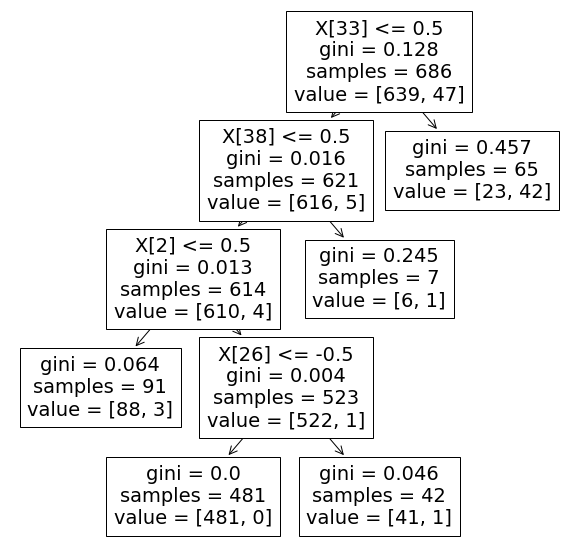

In [186]:
from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(dt);

# Comparision and observations from visualizing the splits

#### The custom made decision tree using WOE and logistic regression generates rules based on probabilities as thresholds.

#### However, the normal decision tree generates rules using attribute values as thresholds

#### This is evident from the visualizations provided above

# Q3:

## Model using 5 fold Cross validation

In [187]:
from sklearn.model_selection import cross_val_predict
y_pred_cv=cross_val_predict(dt,X,Y,cv=5)

#print the accuracy score
accuracy_score(Y, y_pred_cv)

# Print the classification report containing precision, recall, f1-score, support
print(metrics.classification_report(Y, y_pred_cv))

#print the ROC_AUC score
print(roc_auc_score(Y, y_pred_cv))

              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       803
         1.0       0.65      0.87      0.74        55

    accuracy                           0.96       858
   macro avg       0.82      0.92      0.86       858
weighted avg       0.97      0.96      0.96       858

0.9201743462017433


## Student t test for single attribute 

In [188]:
import scipy.stats as stats
 
# Perform the two sample t-test with equal variances
stats.ttest_ind(a=Y_test, b=Y_pred1, equal_var=True)

Ttest_indResult(statistic=array([-59.20726307]), pvalue=array([8.0838724e-182]))

Two sample t-test has the following hypothesis:

H0 => µ1 = µ2 (population mean of given class labels is equal to the mean of the predicted class labels)

HA => µ1 ≠µ2 (population mean of given class labels is different from the mean of the predicted class labels)

Here, since the p-value (8.0838724e-182) is less than alpha = 0.05 so we reject the null hypothesis (H0) of the test.

## Student t test for two attributes 

In [189]:
import scipy.stats as stats
 
# Perform the two sample t-test with equal variances
stats.ttest_ind(a=Y_test, b=Y_pred2, equal_var=True)

Ttest_indResult(statistic=array([-59.20726307]), pvalue=array([8.0838724e-182]))

Two sample t-test has the following hypothesis:

H0 => µ1 = µ2 (population mean of given class labels is equal to the mean of the predicted class labels)

HA => µ1 ≠µ2 (population mean of given class labels is different from the mean of the predicted class labels)

Here, since the p-value (8.0838724e-182) is less than alpha = 0.05 so we reject the null hypothesis (H0) of the test.

In [190]:
# Since the accuracy of both the models is similar ,the poosible reason for this may be that when we are taking two 
# attributes for making the model both of them are possibly correlated with each other.

#Hence, the presence of two attributes per node versus one attribute per node both are generating similar results in terms
# of precision, recall, F1 score and accuracy .